In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Input
import keras_tuner
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install keras_tuner

In [ ]:
!unzip -q /content/drive/MyDrive/project_mri.zip

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)
train_data = train_datagen.flow_from_directory(
    '/content/project_mri_aug/Training',
    classes = ['glioma' , 'meningioma' , 'notumor' , 'pituitary'],
    batch_size = 64,
    target_size = (256,256)
)

Found 15980 images belonging to 4 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_data = test_datagen.flow_from_directory(
    '/content/project_mri_aug/Testing',
    classes = ['glioma' , 'meningioma' , 'notumor' , 'pituitary'],
    batch_size = 64,
    target_size = (256,256)
)

Found 1705 images belonging to 4 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(256, 256, 3), filters=64,kernel_size=(3,3), padding="same",activation='relu',use_bias=True))
model.add(Conv2D(filters=32,kernel_size=(3,3), padding="same",activation='relu',use_bias=True))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu',use_bias=True))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu',use_bias=True))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu',use_bias=True))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu',use_bias=True))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu',use_bias=True))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 126, 126, 128)     36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        7

In [ ]:
result = model.fit(train_data, epochs = 10, validation_data = test_data)

Epoch 1/10
250/250 [==============================] - 111s 391ms/step - loss: 1.2681 - accuracy: 0.3524 - val_loss: 1.3226 - val_accuracy: 0.4493
Epoch 2/10
250/250 [==============================] - 94s 376ms/step - loss: 0.8945 - accuracy: 0.6114 - val_loss: 1.1684 - val_accuracy: 0.6264
Epoch 3/10
250/250 [==============================] - 95s 380ms/step - loss: 0.5734 - accuracy: 0.7725 - val_loss: 0.9562 - val_accuracy: 0.6827
Epoch 4/10
250/250 [==============================] - 95s 381ms/step - loss: 0.4418 - accuracy: 0.8258 - val_loss: 0.8878 - val_accuracy: 0.7630
Epoch 5/10
250/250 [==============================] - 95s 381ms/step - loss: 0.3331 - accuracy: 0.8746 - val_loss: 0.8778 - val_accuracy: 0.7730
Epoch 6/10
250/250 [==============================] - 95s 381ms/step - loss: 0.2617 - accuracy: 0.9065 - val_loss: 0.6631 - val_accuracy: 0.8563
Epoch 7/10
250/250 [==============================] - 95s 381ms/step - loss: 0.1982 - accuracy: 0.9297 - val_loss: 0.8642 - val_a

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
my_model = load_model('/content/mri_model.h5')

In [ ]:
import cv2
img = '/content/project_mri_aug/Training/glioma/Img_1745.jpg'
frame = cv2.imread(img)
frame=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY )
image_1_resize = cv2.resize(frame,(256,256))

In [ ]:
image_1_resize.shape

(256, 256)

In [ ]:
ans = np.dstack([image_1_resize,image_1_resize,image_1_resize])
ans = np.expand_dims(ans, axis = 0)

In [ ]:
ans.shape

(1, 256, 256, 3)

In [ ]:
pred = my_model.predict(ans)
print(pred)


1/1 [==============================] - 0s 17ms/step
[[0. 0. 1. 0.]]


In [ ]:
pred[0][2]

1.0

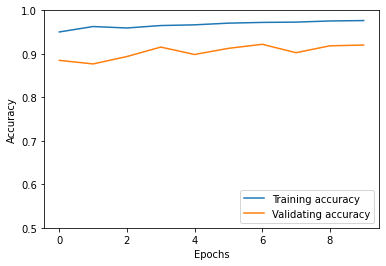

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result.history['accuracy'], label='Training accuracy')
plt.plot(result.history['val_accuracy'], label='Validating accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc = 'lower right')

Model 2

In [ ]:
train_datagen1 = ImageDataGenerator(rescale = 1./255)
train_data1 = train_datagen1.flow_from_directory(
    '/content/project_mri_no_aug/Training',
    classes = ['glioma' , 'meningioma' , 'notumor' , 'pituitary'],
    batch_size = 64,
    target_size = (256,256)
)

Found 7989 images belonging to 4 classes.


In [ ]:
test_datagen1 = ImageDataGenerator(rescale = 1./255)
test_data1 = test_datagen1.flow_from_directory(
    '/content/project_mri_no_aug/Testing',
    classes = ['glioma' , 'meningioma' , 'notumor' , 'pituitary'],
    batch_size = 64,
    target_size = (256,256)
)

Found 1705 images belonging to 4 classes.


In [ ]:
model2 = Sequential()
model2.add(Conv2D(input_shape=(256, 256, 3), filters=32,kernel_size=(3,3), padding="same",activation='relu'))
model2.add(Conv2D(filters=32,kernel_size=(3,3), padding="same",activation='relu'))
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(256, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(256, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))

model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(4,activation='softmax'))

In [ ]:
model2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [ ]:
result2 = model2.fit(train_data1,steps_per_epoch = 100,epochs = 10, validation_data = test_data1)

Epoch 1/10
100/100 [==============================] - 38s 342ms/step - loss: 0.9875 - accuracy: 0.5647 - val_loss: 0.9463 - val_accuracy: 0.6135
Epoch 2/10
100/100 [==============================] - 31s 309ms/step - loss: 0.6613 - accuracy: 0.7267 - val_loss: 0.9036 - val_accuracy: 0.6856
Epoch 3/10
100/100 [==============================] - 33s 325ms/step - loss: 0.4751 - accuracy: 0.8147 - val_loss: 0.7160 - val_accuracy: 0.7267
Epoch 4/10
100/100 [==============================] - 31s 308ms/step - loss: 0.3736 - accuracy: 0.8565 - val_loss: 0.7425 - val_accuracy: 0.7425
Epoch 5/10
100/100 [==============================] - 31s 312ms/step - loss: 0.2954 - accuracy: 0.8904 - val_loss: 0.6806 - val_accuracy: 0.7865
Epoch 6/10
100/100 [==============================] - 31s 309ms/step - loss: 0.2514 - accuracy: 0.9052 - val_loss: 0.7824 - val_accuracy: 0.8252
Epoch 7/10
100/100 [==============================] - 31s 308ms/step - loss: 0.2094 - accuracy: 0.9247 - val_loss: 0.9255 - val_ac

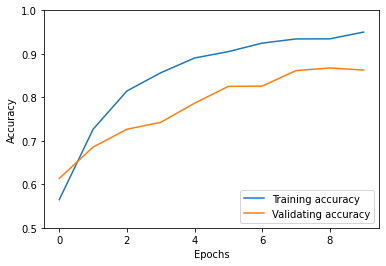

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result2.history['accuracy'], label='Training accuracy')
plt.plot(result2.history['val_accuracy'], label='Validating accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc = 'lower right')

In [ ]:
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), activation="relu", input_shape=(256, 256, 3)))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(64, (3, 3), activation="relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(128, (3, 3), activation="relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(256, (3, 3), activation="relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(512, (3, 3), activation="relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2)))


classifier.add(Flatten())

classifier.add(Dense(activation = 'relu', units = 1024))
classifier.add(Dropout(0.4))
classifier.add(Dense(activation = 'relu', units = 512))
classifier.add(Dropout(0.4))
classifier.add(Dense(activation = 'softmax', units = 4))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [ ]:
result3 = classifier.fit(train_data1,steps_per_epoch = 100,epochs = 10, validation_data = test_data1)

Epoch 1/10
100/100 [==============================] - 31s 257ms/step - loss: 0.8646 - accuracy: 0.6171 - val_loss: 0.9890 - val_accuracy: 0.6786
Epoch 2/10
100/100 [==============================] - 24s 244ms/step - loss: 0.4897 - accuracy: 0.8006 - val_loss: 0.9324 - val_accuracy: 0.7337
Epoch 3/10
100/100 [==============================] - 25s 247ms/step - loss: 0.3466 - accuracy: 0.8633 - val_loss: 0.8015 - val_accuracy: 0.8252
Epoch 4/10
100/100 [==============================] - 24s 237ms/step - loss: 0.2304 - accuracy: 0.9119 - val_loss: 0.7396 - val_accuracy: 0.8745
Epoch 5/10
100/100 [==============================] - 24s 236ms/step - loss: 0.1785 - accuracy: 0.9320 - val_loss: 0.7562 - val_accuracy: 0.8522
Epoch 6/10
100/100 [==============================] - 23s 233ms/step - loss: 0.1236 - accuracy: 0.9538 - val_loss: 0.7437 - val_accuracy: 0.9009
Epoch 7/10
100/100 [==============================] - 23s 233ms/step - loss: 0.0921 - accuracy: 0.9665 - val_loss: 0.6442 - val_ac

In [ ]:
def build_model(hp):
  input = Input(shape=(256, 256, 3))
  x = input
  model = Sequential()
  model.add(Conv2D(input_shape=(256, 256, 3), filters=hp.Int('conv_0_filter', min_value=32, max_value=128, step=16),kernel_size=hp.Choice('conv_0_kernel', values = [3,5]), padding=hp.Choice('padding',['same','valid']),activation=hp.Choice('activation',['tanh','relu']),use_bias=True))
  model.add(Conv2D(filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),kernel_size=hp.Choice('conv_1_kernel', values = [3,5]), padding="same",activation='relu',use_bias=True))
  model.add(MaxPooling2D((2, 2)))

  model.add(Conv2D( filters=hp.Int('conv_2_filter', min_value=32, max_value=128, step=16),kernel_size=hp.Choice('conv_2_kernel', values = [3,5]), activation=hp.Choice('activation',['tanh','relu']),use_bias=True))
  model.add(MaxPooling2D((2, 2)))
  

  model.add(Conv2D( filters=hp.Int('conv_3_filter', min_value=32, max_value=128, step=16),kernel_size=hp.Choice('conv_3_kernel', values = [3,5]),activation=hp.Choice('activation',['tanh','relu']),use_bias=True))
  model.add(MaxPooling2D((2, 2)))
  

  model.add(Conv2D(filters=hp.Int('conv_4_filter', min_value=32, max_value=128, step=16),kernel_size=hp.Choice('conv_4_kernel', values = [1,3]),activation=hp.Choice('activation',['tanh','relu']),use_bias=True))
  model.add(MaxPooling2D((2, 2)))


  model.add(Conv2D(filters=hp.Int('conv_5_filter', min_value=32, max_value=128, step=16),kernel_size=hp.Choice('conv_5_kernel', values = [1,3]),activation=hp.Choice('activation',['tanh','relu']),use_bias=True))
  model.add(MaxPooling2D((2, 2)))

  model.add(Conv2D(filters=hp.Int('conv_6_filter', min_value=32, max_value=128, step=16),kernel_size=hp.Choice('conv_6_kernel', values = [1,3]),activation=hp.Choice('activation',['tanh','relu']),use_bias=True))
  model.add(MaxPooling2D((3, 3)))

  model.add(Flatten())
  model.add(Dense(units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16), activation='relu'))
  if hp.Boolean("dropout"):
        model.add(Dropout(rate=0.3))
  model.add(Dense(units=hp.Int('dense_2_units', min_value=32, max_value=128, step=16), activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(4,activation='softmax'))
  model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
  
  return model


In [ ]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  """Entry point for launching an IPython kernel.


In [ ]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=3)

In [ ]:
tuner_search.search(train_data,validation_data = test_data,epochs=10)

  1/250 [..............................] - ETA: 8:17:17 - loss: 1.3982 - accuracy: 0.2500

In [ ]:
model1=tuner_search.get_best_models(num_models=1)[0]

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 96)      7296      
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 128)     307328    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 128)    0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 126, 126, 96)      110688    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 96)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 59, 59, 48)        1

In [ ]:
import numpy as np
train_labels = np.array([0.0,1.0,2.0,3.0])

In [ ]:
tuner_search1=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=3)

In [ ]:
tuner_search1.search(train_data,validation_data = test_data,epochs=1)

In [ ]:
for i in train_data:
    idx = (train_data.batch_index - 1) * train_data.batch_size
    train_label.append(train_data.filenames[idx : idx + train_data.batch_size])

In [ ]:
train_label

['pituitary/Img_1564.jpg',
 'pituitary/Img_1565.jpg',
 'pituitary/Img_1566.jpg',
 'pituitary/Img_1567.jpg',
 'pituitary/Img_1568.jpg',
 'pituitary/Img_1569.jpg',
 'pituitary/Img_157.jpg',
 'pituitary/Img_1570.jpg',
 'pituitary/Img_1571.jpg',
 'pituitary/Img_1572.jpg',
 'pituitary/Img_1573.jpg',
 'pituitary/Img_1574.jpg',
 'pituitary/Img_1575.jpg',
 'pituitary/Img_1576.jpg',
 'pituitary/Img_1577.jpg',
 'pituitary/Img_1578.jpg',
 'pituitary/Img_1579.jpg',
 'pituitary/Img_158.jpg',
 'pituitary/Img_1580.jpg',
 'pituitary/Img_1581.jpg',
 'pituitary/Img_1582.jpg',
 'pituitary/Img_1583.jpg',
 'pituitary/Img_1584.jpg',
 'pituitary/Img_1585.jpg',
 'pituitary/Img_1586.jpg',
 'pituitary/Img_1587.jpg',
 'pituitary/Img_1588.jpg',
 'pituitary/Img_1589.jpg',
 'pituitary/Img_159.jpg',
 'pituitary/Img_1590.jpg',
 'pituitary/Img_1591.jpg',
 'pituitary/Img_1592.jpg',
 'pituitary/Img_1593.jpg',
 'pituitary/Img_1594.jpg',
 'pituitary/Img_1595.jpg',
 'pituitary/Img_1596.jpg',
 'pituitary/Img_1597.jpg',
 'pi

In [ ]:
a = np.arange(8).reshape(2, 4)
def generate():
    while 1:
        x,y =train_data.next()
        yield [x] ,[a,y]

In [ ]:
train_data.filenames

['glioma/Img_1.jpg',
 'glioma/Img_10.jpg',
 'glioma/Img_100.jpg',
 'glioma/Img_1000.jpg',
 'glioma/Img_1001.jpg',
 'glioma/Img_1002.jpg',
 'glioma/Img_1003.jpg',
 'glioma/Img_1004.jpg',
 'glioma/Img_1005.jpg',
 'glioma/Img_1006.jpg',
 'glioma/Img_1007.jpg',
 'glioma/Img_1008.jpg',
 'glioma/Img_1009.jpg',
 'glioma/Img_101.jpg',
 'glioma/Img_1010.jpg',
 'glioma/Img_1011.jpg',
 'glioma/Img_1012.jpg',
 'glioma/Img_1013.jpg',
 'glioma/Img_1014.jpg',
 'glioma/Img_1015.jpg',
 'glioma/Img_1016.jpg',
 'glioma/Img_1017.jpg',
 'glioma/Img_1018.jpg',
 'glioma/Img_1019.jpg',
 'glioma/Img_102.jpg',
 'glioma/Img_1020.jpg',
 'glioma/Img_1021.jpg',
 'glioma/Img_1022.jpg',
 'glioma/Img_1023.jpg',
 'glioma/Img_1024.jpg',
 'glioma/Img_1025.jpg',
 'glioma/Img_1026.jpg',
 'glioma/Img_1027.jpg',
 'glioma/Img_1028.jpg',
 'glioma/Img_1029.jpg',
 'glioma/Img_103.jpg',
 'glioma/Img_1030.jpg',
 'glioma/Img_1031.jpg',
 'glioma/Img_1032.jpg',
 'glioma/Img_1033.jpg',
 'glioma/Img_1034.jpg',
 'glioma/Img_1035.jpg',
 

In [ ]:
import math
number_of_examples = len(train_data.filenames)
number_of_generator_calls = math.ceil(number_of_examples / (1.0 * 64)) 
# 1.0 above is to skip integer division

test_labels = []

for i in range(0,int(number_of_generator_calls)):
    test_labels.extend(np.array(train_data[i][1]))

In [ ]:
test_labels

[array([0., 0., 1., 0.], dtype=float32),
 array([1., 0., 0., 0.], dtype=float32),
 array([1., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 1.], dtype=float32),
 array([0., 0., 0., 1.], dtype=float32),
 array([0., 0., 0., 1.], dtype=float32),
 array([1., 0., 0., 0.], dtype=float32),
 array([0., 0., 1., 0.], dtype=float32),
 array([0., 1., 0., 0.], dtype=float32),
 array([0., 0., 0., 1.], dtype=float32),
 array([0., 0., 0., 1.], dtype=float32),
 array([0., 0., 0., 1.], dtype=float32),
 array([0., 0., 0., 1.], dtype=float32),
 array([1., 0., 0., 0.], dtype=float32),
 array([0., 1., 0., 0.], dtype=float32),
 array([0., 0., 0., 1.], dtype=float32),
 array([0., 0., 0., 1.], dtype=float32),
 array([0., 0., 1., 0.], dtype=float32),
 array([0., 0., 0., 1.], dtype=float32),
 array([0., 0., 0., 1.], dtype=float32),
 array([1., 0., 0., 0.], dtype=float32),
 array([1., 0., 0., 0.], dtype=float32),
 array([0., 1., 0., 0.], dtype=float32),
 array([1., 0., 0., 0.], dtype=float32),
 array([0., 0., 